In [1]:
import cv2 as cv
import easyocr
from matplotlib import pyplot as plt
import numpy as np
import imutils

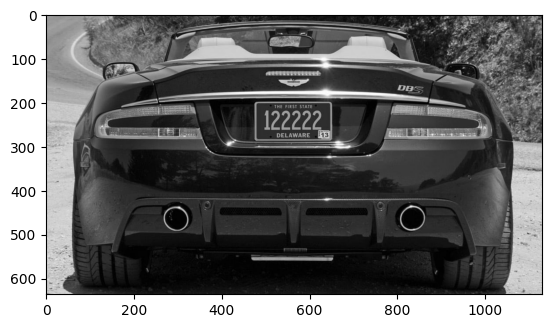

In [15]:
img = cv.imread('3.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))

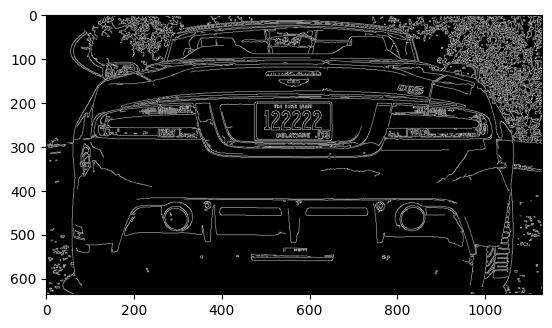

In [16]:
bfitlter = cv.bilateralFilter(gray,10,10,10)
can = cv.Canny(bfitlter,30,200)
plt.imshow(cv.cvtColor(can,cv.COLOR_BGR2RGB))

In [17]:
keypoints = cv.findContours(can,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv.contourArea,reverse=True)[:10]

In [18]:
location = None
for contour in contours :
    approx=cv.approxPolyDP(contour,10,True)
    if len(approx) == 4 :
        location = approx
        break
    

In [19]:
print(location)

[[[475 202]]

 [[474 286]]

 [[651 284]]

 [[647 199]]]


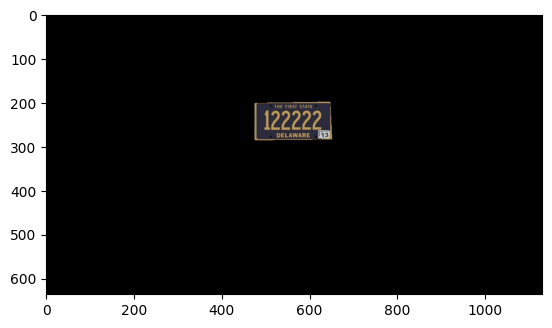

In [20]:
mask = np.zeros(gray.shape,np.uint8)
nplate=cv.drawContours(mask,[location],0,255,-1)
nplate = cv.bitwise_and(img,img,mask=mask)
plt.imshow(cv.cvtColor(nplate,cv.COLOR_BGR2RGB))

In [21]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_imgs = gray[x1:x2+1,y1:y2+1]

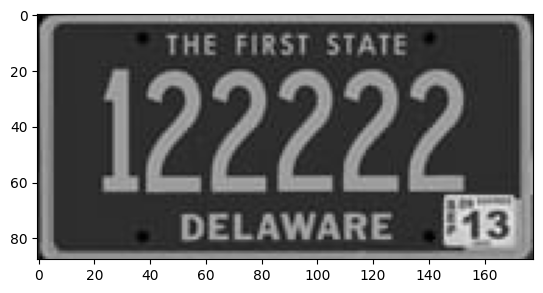

In [22]:
plt.imshow(cv.cvtColor(cropped_imgs,cv.COLOR_BGR2RGB))

In [23]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_imgs)
result

[([[45, 5], [137, 5], [137, 19], [45, 19]],
  'The First State',
  0.4848244642871696),
 ([[13, 13], [165, 13], [165, 75], [13, 75]], '122222', 0.9978247007484718),
 ([[49, 69], [131, 69], [131, 85], [49, 85]], 'DELAWARE', 0.9982352562894483),
 ([[141, 63], [163, 63], [163, 83], [141, 83]], 'Tr', 0.1147686925697207)]

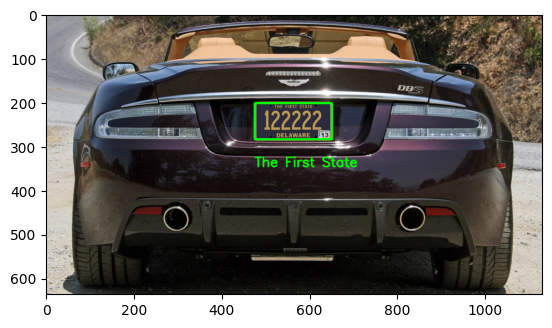

In [29]:
font=cv.FONT_HERSHEY_SIMPLEX
text = result[0][-2]
font = cv.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color = (0,255,0),thickness=2,lineType=cv.LINE_AA)
res=cv.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv.cvtColor(res,cv.COLOR_BGR2RGB))